<a href="https://colab.research.google.com/github/delibae/AI_study/blob/main/RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Model

In [12]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/drive/MyDrive/AI_3/mymodel')

In [ ]:
model.summary()

# Data Preprocessing

In [2]:
import cv2
import numpy as np

In [3]:
def selective_search(image, method="fast"):
  # initialize OpenCV's selective search implementation and set the
  # input image
  ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
  ss.setBaseImage(image)
  # check to see if we are using the *fast* but *less accurate* version
  # of selective search
  if method == "fast":
    ss.switchToSelectiveSearchFast()
  # otherwise we are using the *slower* but *more accurate* version
  else:
    ss.switchToSelectiveSearchQuality()
  # run selective search on the input image
  rects = ss.process()
  # return the region proposal bounding boxes
  return rects

# Make Boxes



In [4]:
img_path = '/content/drive/MyDrive/AI_3/true.jpg'

img = cv2.imread(img_path)

rp_boxes = selective_search(img)

In [18]:
len(rp_boxes)

2531

In [8]:
boxes = []
from ctypes import resize
H, W = img.shape[:2]
cnt = 0
for (x,y,w,h) in rp_boxes:
  if (W*0.1) > w and (H*0.1) > h:
    continue
  cnt += 1

  cropped_box = img[y: y+h, x:x+h]
  cropped_box = cv2.cvtColor(cropped_box, cv2.COLOR_BGR2RGB)
  # to make model input size
  cropped_box = cv2.resize(cropped_box,(75,75))

  cv2.rectangle(img, (x,y),(x+w, y+h), (0,255,0),2)

  np_box = np.array(cropped_box)
  boxes.append(np_box)

print(len(boxes))

1835


In [17]:
from google.colab.patches import cv2_imshow


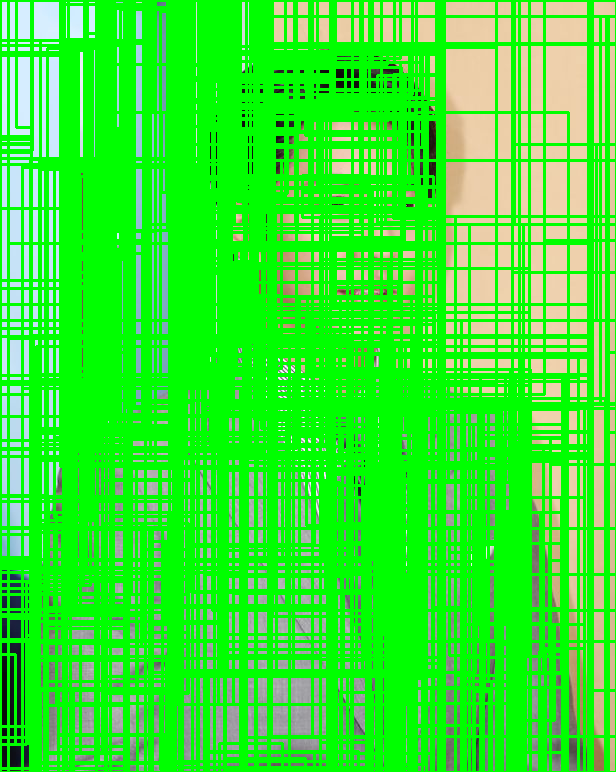

In [10]:
cv2_imshow(img)

In [20]:
img = cv2.imread(img_path)
result = model.predict(np.array(boxes))
for idx, res in enumerate(result):

  (x,y,w,h) = rp_boxes[idx]
  if res[0] > res[1]:
    if res[0] == 1:
        cv2.rectangle(img, (x,y),(x+w, y+h), (0,255,0),2)
  else:
    if res[1] == 1:
      cv2.rectangle(img, (x,y),(x+w, y+h), (255,0,0),2)

58/58 [==============================] - 21s 365ms/step


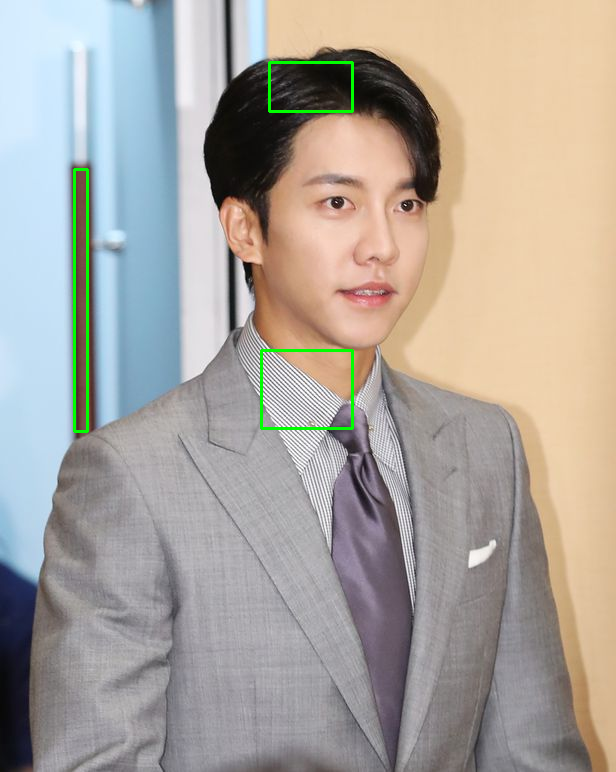

In [21]:
cv2_imshow(img)